### Linear Regression

Step 1: Libraries ခေါ်ယူခြင်း (Importing Libraries)
-   Data Analysis နှင့် Visualization လုပ်ငန်းစဉ်များအတွက် မရှိမဖြစ်လိုအပ်သော Tools (Libraries) များကို Python env ထဲသို့ ခေါ်ယူလိုက်ခြင်း ဖြစ်သည်။

In [13]:
import pandas as pd              

#   Data ကို ဖတ်မယ်
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Git\AI_2026\Day06 Liner and logistic Regression, Perceptron, train and test\groupB\ksh_salary_prediction\Salary Data.csv')
df.tail() 

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


### Multi-Linear Regression

Step 15: Multiple Linear Regression (Features များစွာ အသုံးပြုခြင်း)
-   အရင်အဆင့်မှာ ငါးရဲ့အလျား (Length2) တစ်ခုတည်းကိုပဲ သုံးခဲ့ပေမဲ့၊ အခုတစ်ခါမှာတော့ ငါးရဲ့ ကိုယ်ထည်အတိုင်းအတာအားလုံး (အလျား ၃ မျိုး၊ အမြင့်၊ အနံ) ကို Features အဖြစ် အသုံးပြုပြီး ပိုမိုတိကျတဲ့ Model တစ်ခု တည်ဆောက်မှာ ဖြစ်ပါတယ်။ ဒါကို Multiple Linear Regression လို့ ခေါ်ပါတယ်။

In [38]:
# ငါး၏ အလေးချိန် ကို predict လုပ်ဖို့ feature ၅ ခုလုံးကို X အဖြစ် သတ်မှတ်ခြင်း
X = df[['Age','Years of Experience']]

# ခန့်မှန်းလိုသည့် အဖြေ (Target)
y = df['Salary']

# Data ရဲ့ ပုံစံကို စစ်ဆေးခြင်း
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

display(X.head())  # Features ၏ ပထမဆုံး ၅ ကြောင်းကို ပြရန်

Features (X) shape: (375, 2)
Target (y) shape: (375,)


,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0


Step 16: Multiple Linear Regression (MLR) Model ကို သင်ကြားပေးခြင်း
-   ယခုအဆင့်မှာတော့ Features ၅ ခုလုံးကို အသုံးပြုပြီး Multiple Linear Regression Model ကို တည်ဆောက်မှာ ဖြစ်ပါတယ်။ Feature တစ်ခုတည်း သုံးတာနဲ့ မတူဘဲ Model က Variable အားလုံးရဲ့ ဆက်စပ်မှုကို တစ်ပြိုင်နက် တွက်ချက်သွားမှာပါ။

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Check for missing values in features and target
print('Missing values in X:')
print(X.isnull().sum())
print('Missing values in y:')
print(y.isnull().sum())

# Impute missing numeric values with the column mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).ravel(), name=y.name)

# Linear Regression Model တည်ဆောက်မယ်
mlr_model = LinearRegression()  # Model Object တစ်ခုကို စတင်ဖန်တီးခြင်း

# Model Training
mlr_model.fit(X, y)

Missing values in X:
Age                    2
Years of Experience    2
dtype: int64
Missing values in y:
2


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Step 16: Making Predictions

In [42]:
# Multiple Linear Regression Model ကို သုံးပြီး အလေးချိန်များကို ခန့်မှန်းခြင်း
y_pred = mlr_model.predict(X)

# ခန့်မှန်းချက် အချို့ကို ထုတ်ကြည့်ခြင်း
print("First 5 Predictions:", y_pred[:5])

First 5 Predictions: [ 65915.34320034  48664.33979489 138969.55610934  83166.3466058
 176439.57714371]


In [43]:
print(mlr_model.coef_)      # Weight ၅ ခု ထွက်လာမယ် [w1, w2, w3, w4, w5]
print(mlr_model.intercept_) # Intercept w0 ထွက်လာမယ်

[1885.82915975 4853.84338322]
-18700.406827884144


Step 17: Visualization (Actual vs Predicted Plot)
-   Multiple Linear Regression မှာ Feature တွေ များတဲ့အတွက် Model ရဲ့ တိကျမှုကို သိနိုင်ဖို့ "အဖြေမှန် (Actual)" နဲ့ "ခန့်မှန်းချက် (Predicted)" ဘယ်လောက်နီးစပ်သလဲဆိုတာကို နှိုင်းယှဉ်ပြတဲ့ ပုံကို ဆွဲကြည့်ရမှာ ဖြစ်ပါတယ်။

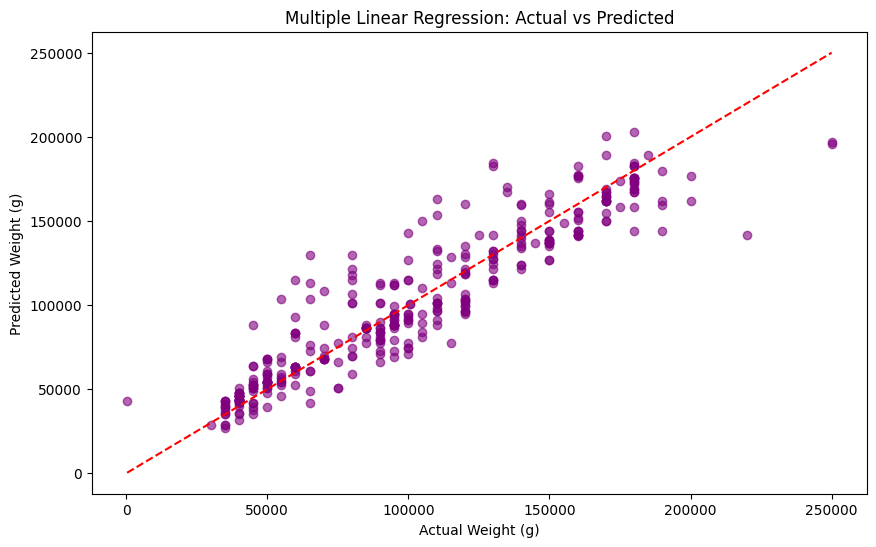

In [44]:
from matplotlib import pyplot as plt

# Visualization (Actual vs Predicted Plot)
plt.figure(figsize=(10, 6))

# Actual (y) ကို X-axis မှာထားပြီး Predicted (y_pred) ကို Y-axis မှာထား၍ အစက်ချခြင်း
plt.scatter(y, y_pred, color='purple', alpha=0.6)

# အဖြေမှန်နှင့် ခန့်မှန်းချက် တထပ်တည်းကျမည့် မျဉ်းကြောင်း (Ideal Line) ကို ဆွဲခြင်း
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

plt.xlabel('Actual Weight (g)')   # အဖြေမှန် (ငါးအလေးချိန် အစစ်အမှန်)
plt.ylabel('Predicted Weight (g)') # ခန့်မှန်းချက် (Model က တွက်ပေးသော အလေးချိန်)
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

Step 16: Multiple Linear Regression ၏ စွမ်းဆောင်ရည်ကို တိုင်းတာခြင်း (Final Evaluation)
-   ဒီအဆင့်မှာတော့ Feature ၅ ခုလုံးကို သုံးထားတဲ့ Model ရဲ့ တိကျမှုကို ကိန်းဂဏန်းတွေနဲ့ အတည်ပြုမှာ ဖြစ်ပါတယ်။ အရင်က Feature ၁ ခုတည်း သုံးခဲ့တဲ့ Model နဲ့ နှိုင်းယှဉ်ရင် ဘယ်လောက် ပိုကောင်းလာသလဲဆိုတာကို သိနိုင်ပါတယ်။

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

# R-squared (Accuracy)
# Model က ဒေတာတွေအပေါ်မှာ ဘယ်လောက်အထိ မှန်မှန်ကန်ကန် ရှင်းပြနိုင်သလဲ (၀ မှ ၁ ကြား)
accuracy = mlr_model.score(X, y) 

# RMSE (Root Mean Square Error)
# ခန့်မှန်းချက်နှင့် အဖြေမှန်ကြားရှိ ပျမ်းမျှအမှား (ယူနစ်မှာ grams ဖြစ်သည်)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {accuracy:.4f}")
print(f"RMS Error: {rmse:.4f} grams")

R2 Score: 0.8687
RMS Error: 17411.0052 grams
